In [1]:
import sys
import os

PACKAGE_PARENT = '../../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.agents.RL.policygrad.torch.ppo import PPOAgent
import ppo_training_configs as PPOCONFIGS


from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# create directory if not present
# create required directories if not present
PPOCONFIGS.create_dirs()

In [3]:

# load configurations
CONST = PPOCONFIGS.CONST
agent_config = PPOCONFIGS.agent_config
env = PPOCONFIGS.env
agent_training_configs = PPOCONFIGS.agent_training_configs

In [6]:
agent = PPOAgent(CONSTANTS=CONST, config=agent_config)
# train agent
agent.train(agent_training_configs)

training_data = agent.get_training_data()

score_history = training_data['rewards']

  0%|          | 1/1000 [00:00<05:34,  2.99it/s]

episode 0 score -5.0 avg score -5.0 time_steps 687 learning_steps 0


  1%|          | 11/1000 [05:21<6:30:12, 23.67s/it]

episode 10 score -4.0 avg score -4.8 time_steps 6747 learning_steps 1


  2%|▏         | 21/1000 [15:39<27:12:17, 100.04s/it]

episode 20 score -5.0 avg score -4.8 time_steps 12592 learning_steps 3


  3%|▎         | 31/1000 [21:05<9:48:11, 36.42s/it] 

episode 30 score -5.0 avg score -4.8 time_steps 18598 learning_steps 4


  4%|▍         | 42/1000 [31:36<19:45:37, 74.26s/it] 

episode 40 score -5.0 avg score -4.8 time_steps 24860 learning_steps 6


  5%|▌         | 52/1000 [36:52<9:05:58, 34.56s/it] 

episode 50 score -5.0 avg score -4.9 time_steps 30573 learning_steps 7


  6%|▌         | 61/1000 [42:08<3:18:38, 12.69s/it]

episode 60 score -5.0 avg score -4.9 time_steps 35896 learning_steps 8


  7%|▋         | 71/1000 [52:13<17:57:23, 69.58s/it]

episode 70 score -5.0 avg score -4.9 time_steps 41918 learning_steps 10


  8%|▊         | 81/1000 [57:21<6:11:15, 24.24s/it]

episode 80 score -5.0 avg score -4.9 time_steps 47846 learning_steps 11


  9%|▉         | 91/1000 [1:07:19<17:06:37, 67.76s/it]

episode 90 score -5.0 avg score -4.9 time_steps 53809 learning_steps 13


 10%|█         | 101/1000 [1:12:16<5:49:53, 23.35s/it]

episode 100 score -4.0 avg score -4.9 time_steps 60005 learning_steps 14


 11%|█         | 111/1000 [1:22:08<12:11:48, 49.39s/it]

episode 110 score -5.0 avg score -4.9 time_steps 67054 learning_steps 16


 12%|█▏        | 121/1000 [1:31:57<25:31:10, 104.52s/it]

episode 120 score -5.0 avg score -4.9 time_steps 73781 learning_steps 18


 13%|█▎        | 131/1000 [1:36:52<8:02:16, 33.30s/it] 

episode 130 score -5.0 avg score -4.9 time_steps 79980 learning_steps 19


 14%|█▍        | 141/1000 [1:46:41<22:58:12, 96.27s/it]

episode 140 score -5.0 avg score -4.9 time_steps 86157 learning_steps 21


 15%|█▌        | 152/1000 [1:51:38<3:59:59, 16.98s/it]

episode 150 score -5.0 avg score -4.9 time_steps 92955 learning_steps 22


 16%|█▌        | 161/1000 [2:01:29<12:00:21, 51.52s/it]

episode 160 score -5.0 avg score -4.8 time_steps 99792 learning_steps 24


 17%|█▋        | 171/1000 [2:06:27<3:49:19, 16.60s/it]

episode 170 score -5.0 avg score -4.8 time_steps 106292 learning_steps 25


 18%|█▊        | 181/1000 [2:16:20<7:52:56, 34.65s/it] 

episode 180 score -5.0 avg score -4.8 time_steps 112710 learning_steps 27


 19%|█▉        | 191/1000 [2:26:09<15:44:39, 70.06s/it]

episode 190 score -5.0 avg score -4.8 time_steps 119452 learning_steps 29


 20%|██        | 201/1000 [2:31:06<7:13:41, 32.57s/it] 

episode 200 score -5.0 avg score -4.9 time_steps 125543 learning_steps 30


 21%|██        | 211/1000 [2:40:55<21:05:52, 96.26s/it]

episode 210 score -4.0 avg score -4.9 time_steps 131575 learning_steps 32


 22%|██▏       | 221/1000 [2:45:49<5:11:27, 23.99s/it]

episode 220 score -5.0 avg score -4.9 time_steps 137644 learning_steps 33


 23%|██▎       | 231/1000 [2:55:39<14:56:35, 69.96s/it]

episode 230 score -4.0 avg score -4.9 time_steps 144809 learning_steps 35


 24%|██▍       | 241/1000 [3:00:36<3:36:48, 17.14s/it]

episode 240 score -5.0 avg score -4.8 time_steps 151237 learning_steps 36


 25%|██▌       | 251/1000 [3:10:28<5:18:48, 25.54s/it]

episode 250 score -5.0 avg score -4.8 time_steps 158207 learning_steps 38


 26%|██▌       | 261/1000 [3:20:20<10:35:00, 51.56s/it]

episode 260 score -5.0 avg score -4.8 time_steps 165305 learning_steps 40


 27%|██▋       | 271/1000 [3:25:18<3:21:19, 16.57s/it]

episode 270 score -5.0 avg score -4.8 time_steps 171477 learning_steps 41


 28%|██▊       | 281/1000 [3:35:09<6:54:59, 34.63s/it]

episode 280 score -5.0 avg score -4.8 time_steps 179151 learning_steps 43


 29%|██▉       | 291/1000 [3:45:02<5:27:14, 27.69s/it]

episode 290 score -5.0 avg score -4.8 time_steps 188014 learning_steps 45


 30%|███       | 301/1000 [3:54:55<6:47:51, 35.01s/it]

episode 300 score -4.0 avg score -4.8 time_steps 195803 learning_steps 47


 31%|███       | 311/1000 [4:04:48<7:02:40, 36.81s/it] 

episode 310 score -5.0 avg score -4.8 time_steps 203795 learning_steps 49


 32%|███▏      | 322/1000 [4:19:36<15:17:55, 81.23s/it] 

episode 320 score -5.0 avg score -4.8 time_steps 213603 learning_steps 52


 33%|███▎      | 331/1000 [4:29:27<19:50:23, 106.76s/it]

episode 330 score -5.0 avg score -4.8 time_steps 221232 learning_steps 54


 34%|███▍      | 341/1000 [4:39:21<14:41:41, 80.28s/it] 

episode 340 score -5.0 avg score -4.8 time_steps 231379 learning_steps 56


 35%|███▌      | 351/1000 [4:49:12<9:35:42, 53.22s/it] 

episode 350 score -5.0 avg score -4.8 time_steps 239957 learning_steps 58


 36%|███▌      | 361/1000 [5:04:00<20:43:23, 116.75s/it]

episode 360 score -4.0 avg score -4.8 time_steps 251248 learning_steps 61


 37%|███▋      | 371/1000 [5:18:46<17:58:07, 102.84s/it]

episode 370 score -5.0 avg score -4.8 time_steps 263165 learning_steps 64


 38%|███▊      | 381/1000 [5:28:36<9:15:27, 53.84s/it] 

episode 380 score -4.0 avg score -4.7 time_steps 273813 learning_steps 66


 39%|███▉      | 391/1000 [5:43:25<10:47:40, 63.81s/it]

episode 390 score -5.0 avg score -4.8 time_steps 285337 learning_steps 69


 40%|████      | 401/1000 [5:58:11<13:59:58, 84.14s/it] 

episode 400 score -5.0 avg score -4.8 time_steps 297039 learning_steps 72


 41%|████      | 411/1000 [6:12:59<20:43:00, 126.62s/it]

episode 410 score -4.0 avg score -4.7 time_steps 308339 learning_steps 75


 42%|████▏     | 421/1000 [6:27:47<15:11:16, 94.43s/it] 

episode 420 score -3.0 avg score -4.8 time_steps 322002 learning_steps 78


 43%|████▎     | 431/1000 [6:47:49<17:58:41, 113.75s/it]

episode 430 score -5.0 avg score -4.8 time_steps 337802 learning_steps 82


 44%|████▍     | 441/1000 [7:14:01<30:25:28, 195.94s/it]

episode 440 score -4.0 avg score -4.8 time_steps 357066 learning_steps 87


 45%|████▌     | 451/1000 [7:39:56<24:43:03, 162.08s/it]

episode 450 score -2.0 avg score -4.7 time_steps 380657 learning_steps 92


 46%|████▌     | 461/1000 [8:05:39<24:13:20, 161.78s/it]

episode 460 score -5.0 avg score -4.7 time_steps 398376 learning_steps 97


 47%|████▋     | 471/1000 [8:31:20<19:03:05, 129.65s/it]

episode 470 score -5.0 avg score -4.7 time_steps 421337 learning_steps 102


 48%|████▊     | 481/1000 [9:02:06<28:04:18, 194.72s/it]

episode 480 score -3.0 avg score -4.7 time_steps 444115 learning_steps 108


 49%|████▉     | 491/1000 [9:28:35<18:01:19, 127.47s/it]

episode 490 score -5.0 avg score -4.6 time_steps 465998 learning_steps 113


 50%|█████     | 501/1000 [10:04:28<29:39:33, 213.97s/it]

episode 500 score -3.0 avg score -4.5 time_steps 493664 learning_steps 120


 51%|█████     | 511/1000 [10:35:13<22:38:16, 166.66s/it]

episode 510 score -5.0 avg score -4.4 time_steps 518997 learning_steps 126


 52%|█████▏    | 521/1000 [11:11:01<24:06:54, 181.24s/it]

episode 520 score -1.0 avg score -4.2 time_steps 547969 learning_steps 133


 53%|█████▎    | 531/1000 [11:46:57<30:06:07, 231.06s/it]

episode 530 score -1.0 avg score -4.0 time_steps 575140 learning_steps 140


 54%|█████▍    | 541/1000 [12:17:40<25:21:15, 198.86s/it]

episode 540 score -4.0 avg score -4.0 time_steps 599472 learning_steps 146


 55%|█████▌    | 551/1000 [12:53:07<29:31:36, 236.74s/it]

episode 550 score -4.0 avg score -3.9 time_steps 627443 learning_steps 153


 56%|█████▌    | 561/1000 [13:29:08<29:20:05, 240.56s/it]

episode 560 score -1.0 avg score -3.6 time_steps 656565 learning_steps 160


 57%|█████▋    | 571/1000 [14:04:15<25:46:23, 216.28s/it]

episode 570 score -2.0 avg score -3.4 time_steps 686515 learning_steps 167


 58%|█████▊    | 581/1000 [14:40:00<24:32:48, 210.90s/it]

episode 580 score 1.0 avg score -3.2 time_steps 714816 learning_steps 174


 59%|█████▉    | 591/1000 [15:15:50<24:06:09, 212.15s/it]

episode 590 score -3.0 avg score -3.1 time_steps 744140 learning_steps 181


 60%|██████    | 601/1000 [15:50:58<18:45:30, 169.25s/it]

episode 600 score -4.0 avg score -2.9 time_steps 774140 learning_steps 188


 61%|██████    | 611/1000 [16:30:47<27:25:58, 253.88s/it]

episode 610 score 0.0 avg score -2.8 time_steps 803282 learning_steps 196


 62%|██████▏   | 621/1000 [17:05:46<24:48:15, 235.61s/it]

episode 620 score 0.0 avg score -2.7 time_steps 833282 learning_steps 203


 63%|██████▎   | 631/1000 [17:40:52<18:46:46, 183.22s/it]

episode 630 score -3.0 avg score -2.6 time_steps 863282 learning_steps 210


 64%|██████▍   | 641/1000 [18:16:44<17:14:26, 172.89s/it]

episode 640 score -5.0 avg score -2.3 time_steps 892250 learning_steps 217


 65%|██████▌   | 651/1000 [18:57:46<25:20:11, 261.35s/it]

episode 650 score -1.0 avg score -2.2 time_steps 921831 learning_steps 225


 66%|██████▌   | 661/1000 [19:28:38<19:41:18, 209.08s/it]

episode 660 score -3.0 avg score -2.3 time_steps 948300 learning_steps 231


 67%|██████▋   | 671/1000 [20:04:32<23:00:24, 251.75s/it]

episode 670 score -2.0 avg score -2.4 time_steps 975514 learning_steps 238


 68%|██████▊   | 681/1000 [20:40:20<22:13:03, 250.73s/it]

episode 680 score -3.0 avg score -2.4 time_steps 1004854 learning_steps 245


 69%|██████▉   | 691/1000 [21:16:39<21:18:14, 248.20s/it]

episode 690 score -1.0 avg score -2.3 time_steps 1033319 learning_steps 252


 70%|███████   | 701/1000 [21:53:27<20:27:20, 246.29s/it]

episode 700 score 0.0 avg score -2.2 time_steps 1062527 learning_steps 259


 71%|███████   | 711/1000 [22:29:06<17:37:08, 219.47s/it]

episode 710 score -2.0 avg score -2.2 time_steps 1091454 learning_steps 266


 72%|███████▏  | 721/1000 [23:04:43<16:19:43, 210.69s/it]

episode 720 score 2.0 avg score -2.1 time_steps 1121139 learning_steps 273


 73%|███████▎  | 731/1000 [23:44:08<19:00:49, 254.46s/it]

episode 730 score -3.0 avg score -2.0 time_steps 1151139 learning_steps 281


 74%|███████▍  | 741/1000 [24:18:41<17:05:26, 237.56s/it]

episode 740 score 2.0 avg score -2.0 time_steps 1181139 learning_steps 288


 75%|███████▌  | 751/1000 [24:53:12<14:16:06, 206.29s/it]

episode 750 score -1.0 avg score -1.9 time_steps 1211139 learning_steps 295


 76%|███████▌  | 761/1000 [25:32:42<16:58:14, 255.62s/it]

episode 760 score -1.0 avg score -1.6 time_steps 1241139 learning_steps 303


 77%|███████▋  | 771/1000 [26:07:15<15:05:14, 237.18s/it]

episode 770 score -2.0 avg score -1.5 time_steps 1269924 learning_steps 310


 78%|███████▊  | 781/1000 [26:41:47<14:23:55, 236.69s/it]

episode 780 score -1.0 avg score -1.4 time_steps 1299771 learning_steps 317


 79%|███████▉  | 791/1000 [27:16:23<12:21:57, 213.00s/it]

episode 790 score -1.0 avg score -1.4 time_steps 1329771 learning_steps 324


 80%|████████  | 801/1000 [27:50:59<9:15:39, 167.54s/it] 

episode 800 score 0.0 avg score -1.4 time_steps 1359667 learning_steps 331


 81%|████████  | 811/1000 [28:30:23<13:10:07, 250.83s/it]

episode 810 score -4.0 avg score -1.4 time_steps 1389273 learning_steps 339


 82%|████████▏ | 821/1000 [29:04:51<11:32:26, 232.10s/it]

episode 820 score 0.0 avg score -1.4 time_steps 1417489 learning_steps 346


 83%|████████▎ | 831/1000 [29:39:24<11:05:05, 236.13s/it]

episode 830 score -3.0 avg score -1.4 time_steps 1447489 learning_steps 353


 84%|████████▍ | 841/1000 [30:13:52<9:05:34, 205.88s/it]

episode 840 score -3.0 avg score -1.4 time_steps 1477489 learning_steps 360


 85%|████████▌ | 851/1000 [30:53:44<10:51:47, 262.46s/it]

episode 850 score -1.0 avg score -1.5 time_steps 1507489 learning_steps 368


 86%|████████▌ | 861/1000 [31:29:35<9:30:10, 246.12s/it]

episode 860 score -1.0 avg score -1.6 time_steps 1537489 learning_steps 375


 87%|████████▋ | 871/1000 [32:05:35<7:40:30, 214.19s/it]

episode 870 score 0.0 avg score -1.6 time_steps 1567489 learning_steps 382


 88%|████████▊ | 881/1000 [32:46:34<8:46:17, 265.35s/it]

episode 880 score -1.0 avg score -1.7 time_steps 1597468 learning_steps 390


 89%|████████▉ | 891/1000 [33:22:26<7:28:37, 246.95s/it]

episode 890 score 0.0 avg score -1.7 time_steps 1627468 learning_steps 397


 90%|█████████ | 901/1000 [33:58:38<6:10:27, 224.52s/it]

episode 900 score -2.0 avg score -1.8 time_steps 1657468 learning_steps 404


 91%|█████████ | 911/1000 [34:34:45<4:19:09, 174.72s/it]

episode 910 score 0.0 avg score -1.8 time_steps 1687468 learning_steps 411


 92%|█████████▏| 921/1000 [35:15:49<5:24:29, 246.46s/it]

episode 920 score -1.0 avg score -1.8 time_steps 1717468 learning_steps 419


 93%|█████████▎| 928/1000 [35:44:50<2:46:24, 138.67s/it]


KeyboardInterrupt: 

In [ ]:
x = [i+1 for i in range(len(score_history))]
# plot_learning_curve(x, score_history, figure_file)
plot_learning_curve_plus_score(x, score_history, figure_file)

In [8]:
agent_training_configs.set('EPISODES', 72) 
agent.train(agent_training_configs)

  1%|▏         | 1/72 [00:01<01:38,  1.38s/it]

episode 0 score 1.0 avg score 1.0 time_steps 3000 learning_steps 0


 15%|█▌        | 11/72 [1:04:12<5:25:02, 319.71s/it]

episode 10 score -1.0 avg score -1.0 time_steps 33000 learning_steps 8


 29%|██▉       | 21/72 [1:43:12<3:46:09, 266.07s/it]

episode 20 score -2.0 avg score -1.5 time_steps 62825 learning_steps 15


 43%|████▎     | 31/72 [2:20:19<2:29:09, 218.29s/it]

episode 30 score -1.0 avg score -1.2 time_steps 92825 learning_steps 22


 57%|█████▋    | 41/72 [2:56:50<1:36:18, 186.41s/it]

episode 40 score -2.0 avg score -1.3 time_steps 122562 learning_steps 29


 71%|███████   | 51/72 [3:38:40<1:33:20, 266.68s/it]

episode 50 score -1.0 avg score -1.4 time_steps 151942 learning_steps 37


 85%|████████▍ | 61/72 [4:15:15<49:10, 268.21s/it]

episode 60 score -1.0 avg score -1.6 time_steps 180359 learning_steps 44


 99%|█████████▊| 71/72 [4:51:54<04:11, 251.87s/it]

episode 70 score 0.0 avg score -1.5 time_steps 210359 learning_steps 51


100%|██████████| 72/72 [4:57:08<00:00, 247.61s/it]


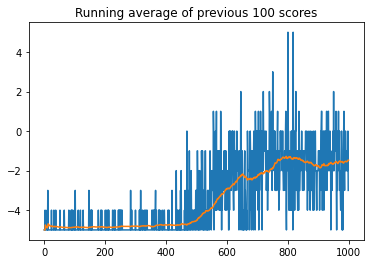

In [11]:
training_data = agent.get_training_data()

score_history = training_data['rewards']

x = [i+1 for i in range(len(score_history))]
# plot_learning_curve(x, score_history, figure_file)
plot_learning_curve_plus_score(x, score_history, figure_file)

In [ ]:
import pickle
# load training data
temp = 'PPO_data/gamma_0.99_alpha_0.0003_reward_483.0_data.pkl'
temp = filenames[1]
training_data_path = temp
print(training_data_path)
with open(training_data_path, 'rb') as f:
    training_data = pickle.load(f)

In [ ]:
import alphaslime.utils.ploty as ploty
figure_file = PPOCONFIGS.base_plot_path + 'avg_rew_cartpolev1_ppo.png'
rewards = training_data['rewards']
title = 'PPO Training Rewards and Average Reward on Cartpole'
x = [i for i in range(len(rewards))]
rn_avg_len = PPOCONFIGS.running_avg_len
ploty.plot_learning_curve_plus_score(x,rewards, figure_file, running_avg_len=rn_avg_len, title=title)